<a href="https://colab.research.google.com/github/SakeerProjects/Deep-Learning-Mini-Project-01/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT RELEVENT LIBRARIES**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

**MOUNT THE GOOGLE DRIVE**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**CHANGE THE CURRENT WORKING DIRECTORY**

In [4]:
os.chdir("/content/drive/My Drive/Colab Notebooks/EngAlfabet/")
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/EngAlfabet'

**LOAD AND DISPLAY A IMAGE FROM A SPECIFIED PATH**

In [5]:

img = image.load_img("Letters/H/H 11.jpeg")

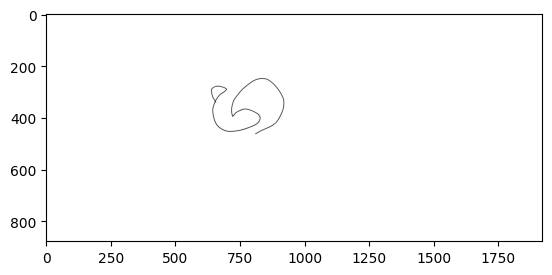

In [6]:

plt.imshow(img)

In [7]:

cv2.imread("Letters/H/H 11.jpeg").shape

(878, 1920, 3)

In [8]:

train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

**CREATE TRAINING AND VALIDATION DATASETS USING ImageDataGenerator**

In [9]:
train_dataset = train.flow_from_directory('Letters/',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

validation_dataset = validation.flow_from_directory('Testing/',
                                                   target_size = (200,200),
                                                   batch_size = 3,
                                                   class_mode = 'binary')

Found 79 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [10]:
train_dataset.class_indices

{'H': 0, 'M': 1}

In [11]:
# Retrieve the array of class indices for each sample in the training dataset
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

**SPECIFYING THE CNN ARCHITECTURE**

In [12]:
# Create a Sequential model
# Convolutional layer with 16 filters, each of size (3, 3), and ReLU activation
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   # MaxPooling layer with pool size (2, 2)
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 32 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 64 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Flatten layer to convert 3D feature maps to 1D feature vectors
                                    tf.keras.layers.Flatten(),
                                   # Dense (fully connected) layer with 512 units and ReLU activation
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                   # Output layer with 1 unit and sigmoid activation for binary classification
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])

In [13]:
# Compile the model with binary crossentropy loss, RMSprop optimizer, and accuracy metric
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

**TRAINING THE MODEL**

In [14]:
# Train the model using the training dataset and validate on the validation dataset
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs = 30,
                      validation_data = validation_dataset)

Epoch 1/30
5/5 [==============================] - 7s 1s/step - loss: 7.3844 - accuracy: 0.7692
Epoch 2/30
5/5 [==============================] - 6s 1s/step - loss: 0.7798 - accuracy: 0.5333
Epoch 3/30
5/5 [==============================] - 4s 605ms/step - loss: 0.7340 - accuracy: 0.4000
Epoch 4/30
5/5 [==============================] - 4s 527ms/step - loss: 0.7189 - accuracy: 0.6000
Epoch 5/30
5/5 [==============================] - 2s 426ms/step - loss: 0.7499 - accuracy: 0.5385
Epoch 6/30
5/5 [==============================] - 4s 772ms/step - loss: 0.8419 - accuracy: 0.4667
Epoch 7/30
5/5 [==============================] - 4s 617ms/step - loss: 0.6377 - accuracy: 0.8000
Epoch 8/30
5/5 [==============================] - 3s 672ms/step - loss: 0.7027 - accuracy: 0.6667
Epoch 9/30
5/5 [==============================] - 4s 807ms/step - loss: 0.7081 - accuracy: 0.5333
Epoch 10/30
5/5 [==============================] - 3s 626ms/step - loss: 0.8298 - accuracy: 0.5333
Epoch 11/30
5/5 [========

In [15]:
# Retrieve the mapping of class names to their indices in the validation dataset
validation_dataset.class_indices

{}

**TESTING SAMPLE DATA**

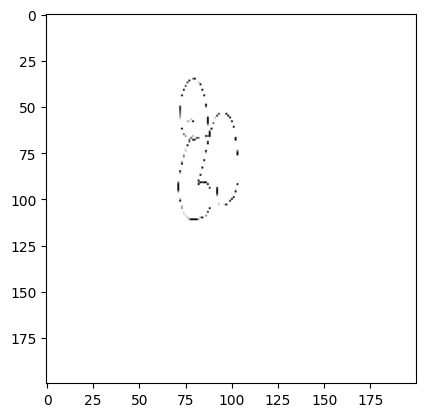

1/1 [==============================] - 0s 145ms/step
This is 'Ma'


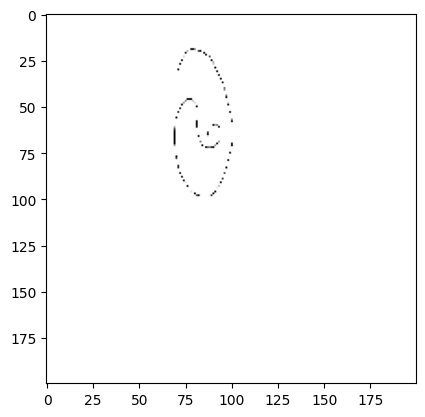

1/1 [==============================] - 0s 43ms/step
This is 'Ma'


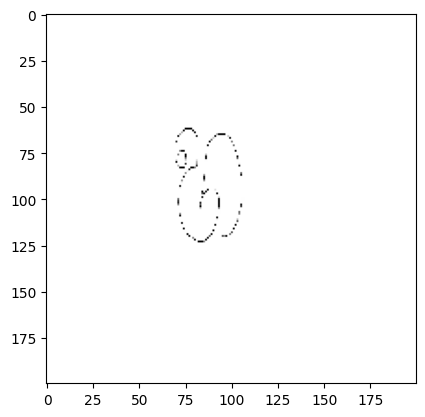

1/1 [==============================] - 0s 160ms/step
This is 'Ma'


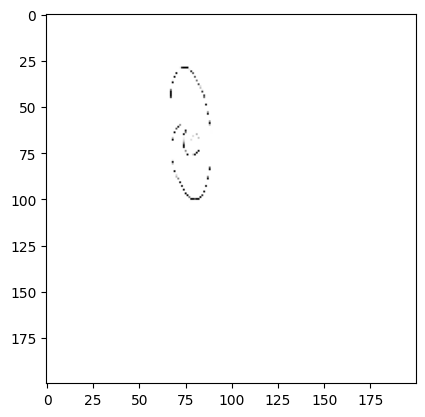

1/1 [==============================] - 0s 114ms/step
This is 'Ma'


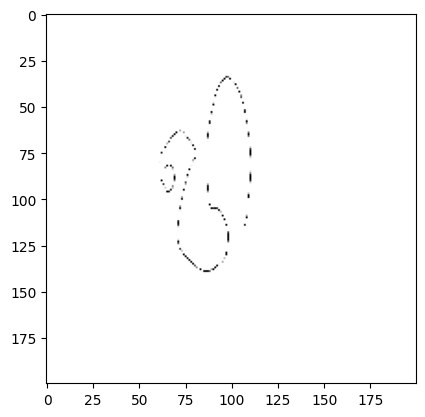

1/1 [==============================] - 0s 41ms/step
This is 'Ma'


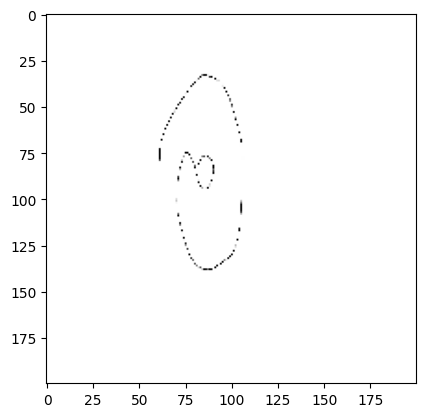

1/1 [==============================] - 0s 40ms/step
This is 'Ma'


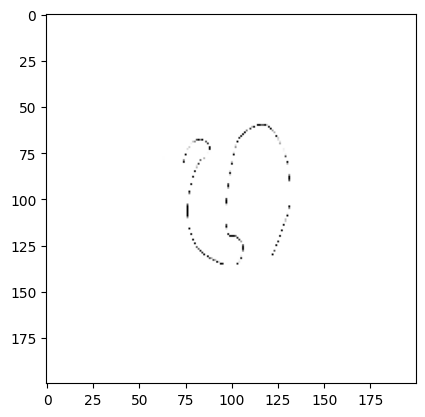

1/1 [==============================] - 0s 36ms/step
This is 'Ha'


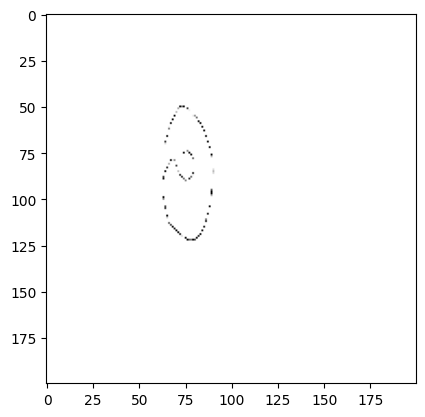

1/1 [==============================] - 0s 35ms/step
This is 'Ma'


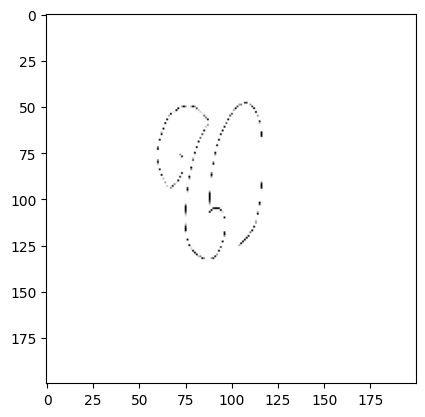

1/1 [==============================] - 0s 35ms/step
This is 'Ma'


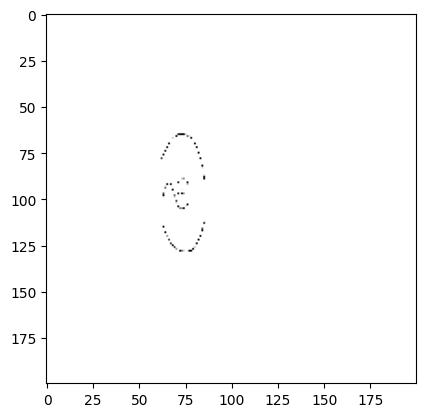

1/1 [==============================] - 0s 52ms/step
This is 'Ma'


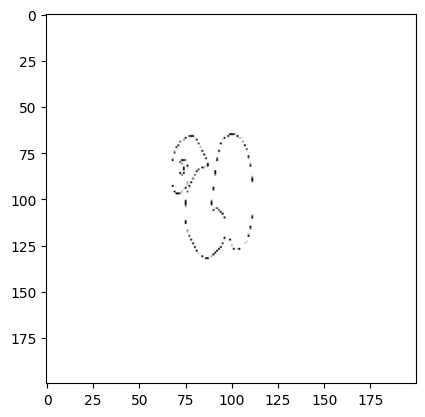

1/1 [==============================] - 0s 41ms/step
This is 'Ha'


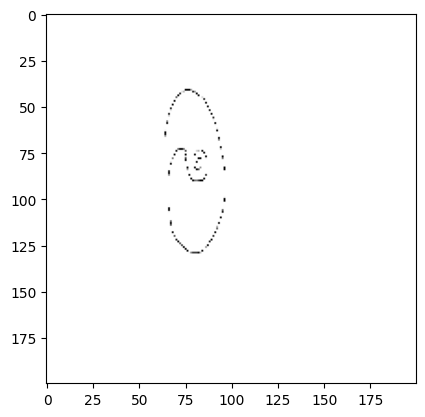

1/1 [==============================] - 0s 43ms/step
This is 'Ma'


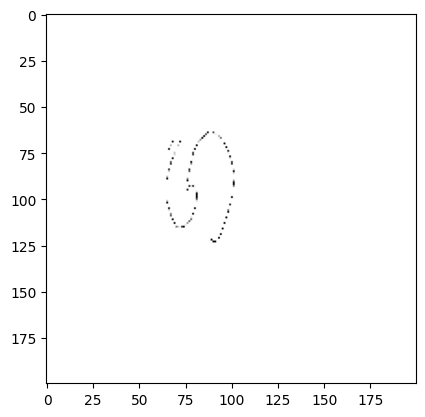

1/1 [==============================] - 0s 40ms/step
This is 'Ma'


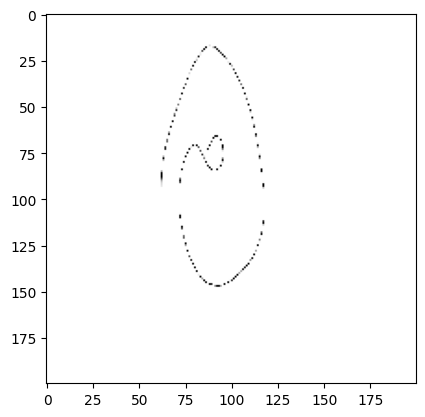

1/1 [==============================] - 0s 44ms/step
This is 'Ma'


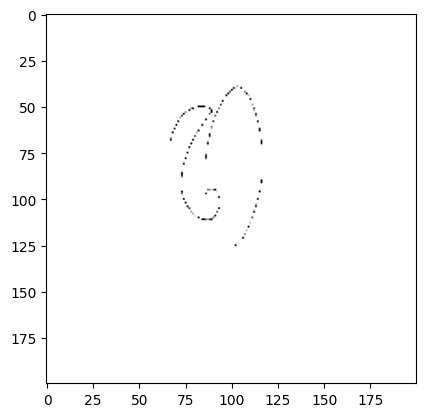

1/1 [==============================] - 0s 43ms/step
This is 'Ma'


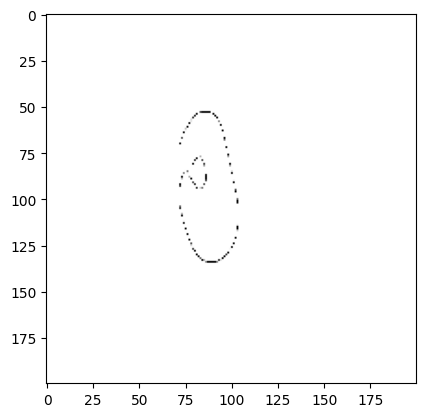

1/1 [==============================] - 0s 44ms/step
This is 'Ma'


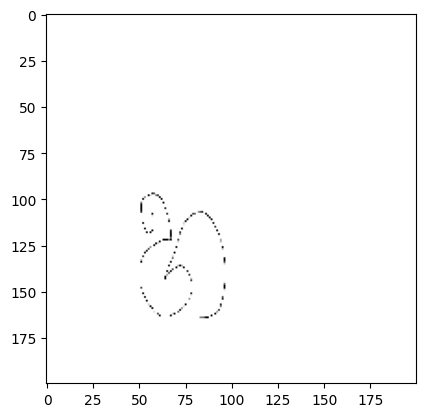

1/1 [==============================] - 0s 42ms/step
This is 'Ma'


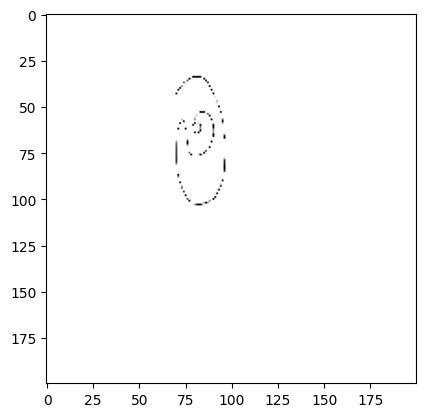

1/1 [==============================] - 0s 60ms/step
This is 'Ma'


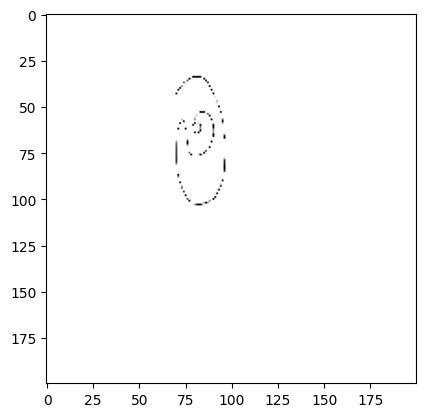

1/1 [==============================] - 0s 64ms/step
This is 'Ma'


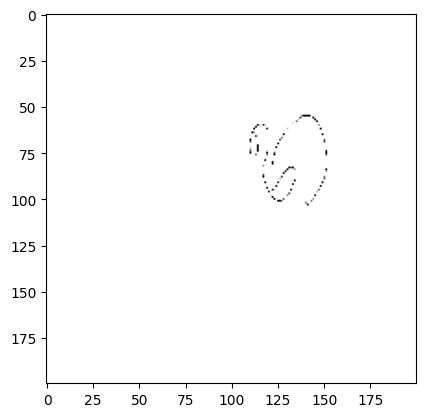

1/1 [==============================] - 0s 80ms/step
This is 'Ha'


In [16]:
# Directory path containing the testing images
dir_path = 'Testing/'

# Loop over each file in the directory
for i in os.listdir(dir_path):
  # Load the image and resize it to the target size
  img = image.load_img(dir_path+ i,target_size=(200,200))
  # Display the image using matplotlib
  plt.imshow(img)
  plt.show()

# Convert the image to a NumPy array and add an extra dimension
  X = image.img_to_array(img)
  X = np.expand_dims(X,axis = 0)
# Stack the array vertically to create a batch of images
  images = np.vstack([X])
# Make a prediction using the trained model
  val = model.predict(images)
# Check the predicted value and print the corresponding class label
  if val == 0:
    print("This is 'Ha'")
  else:
    print("This is 'Ma'")